In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/data_modified.csv')
print("Dataset loaded successfully!")

Dataset loaded successfully!


## Prepare data



In [3]:
from sklearn.model_selection import train_test_split

X = df.drop(['price', 'date', 'street', 'city', 'statezip', 'country'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Data split successfully!")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Data split successfully!
Shape of X_train: (3450, 12)
Shape of X_test: (1150, 12)
Shape of y_train: (3450,)
Shape of y_test: (1150,)


## Train initial model




In [4]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate a RandomForestRegressor object with default hyperparameters
model_before_tuning = RandomForestRegressor(random_state=42)

# Train the model using the training data
model_before_tuning.fit(X_train, y_train)

print("Random Forest model trained successfully with default hyperparameters!")

Random Forest model trained successfully with default hyperparameters!


## Evaluate initial model




In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test data
y_pred_before_tuning = model_before_tuning.predict(X_test)

# Calculate evaluation metrics
mae_before_tuning = mean_absolute_error(y_test, y_pred_before_tuning)
rmse_before_tuning = np.sqrt(mean_squared_error(y_test, y_pred_before_tuning))
r2_before_tuning = r2_score(y_test, y_pred_before_tuning)

# Print the evaluation metrics
print(f"Initial Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_before_tuning}")
print(f"Root Mean Squared Error (RMSE): {rmse_before_tuning}")
print(f"R-squared (R²): {r2_before_tuning}")

Initial Model Performance:
Mean Absolute Error (MAE): 197558.07290969958
Root Mean Squared Error (RMSE): 898068.9039143921
R-squared (R²): 0.042487718738399405


## Tune hyperparameters




In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define a parameter distribution for hyperparameters to tune
param_dist = {
    'n_estimators': np.arange(100, 500, 100),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': np.arange(2, 11, 2),
    'min_samples_leaf': np.arange(1, 11, 2),
    'max_features': ['auto', 'sqrt', 'log2']
}

# Instantiate a RandomForestRegressor object
rf = RandomForestRegressor(random_state=42)

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=10, cv=5, random_state=42, n_jobs=-1, scoring='neg_mean_absolute_error')

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters found:")
print(random_search.best_params_)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_

Best hyperparameters found:
{'n_estimators': np.int64(400), 'min_samples_split': np.int64(2), 'min_samples_leaf': np.int64(3), 'max_features': 'log2', 'max_depth': 30}


## Train tuned model




In [7]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate a RandomForestRegressor object with the best hyperparameters
model_after_tuning = RandomForestRegressor(n_estimators=random_search.best_params_['n_estimators'],
                                           max_depth=random_search.best_params_['max_depth'],
                                           min_samples_split=random_search.best_params_['min_samples_split'],
                                           min_samples_leaf=random_search.best_params_['min_samples_leaf'],
                                           max_features=random_search.best_params_['max_features'],
                                           random_state=42)

# Train the model on the training data
model_after_tuning.fit(X_train, y_train)

print("Random Forest model trained successfully with best hyperparameters!")

Random Forest model trained successfully with best hyperparameters!


## Evaluate tuned model




In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test data using the tuned model
y_pred_after_tuning = model_after_tuning.predict(X_test)

# Calculate evaluation metrics for the tuned model
mae_after_tuning = mean_absolute_error(y_test, y_pred_after_tuning)
rmse_after_tuning = np.sqrt(mean_squared_error(y_test, y_pred_after_tuning))
r2_after_tuning = r2_score(y_test, y_pred_after_tuning)

# Print the evaluation metrics for the tuned model
print(f"Tuned Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_after_tuning}")
print(f"Root Mean Squared Error (RMSE): {rmse_after_tuning}")
print(f"R-squared (R²): {r2_after_tuning}")

Tuned Model Performance:
Mean Absolute Error (MAE): 191929.56560299377
Root Mean Squared Error (RMSE): 893548.6011195927
R-squared (R²): 0.052102465706316825


## Compare results




In [9]:
print("Performance Comparison:")
print("-" * 30)
print(f"Initial Model:")
print(f"  Mean Absolute Error (MAE): {mae_before_tuning:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_before_tuning:.2f}")
print(f"  R-squared (R²): {r2_before_tuning:.4f}")
print("-" * 30)
print(f"Tuned Model:")
print(f"  Mean Absolute Error (MAE): {mae_after_tuning:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_after_tuning:.2f}")
print(f"  R-squared (R²): {r2_after_tuning:.4f}")
print("-" * 30)

if mae_after_tuning < mae_before_tuning:
    print("Tuning improved the Mean Absolute Error.")
else:
    print("Tuning did not improve the Mean Absolute Error.")

if rmse_after_tuning < rmse_before_tuning:
    print("Tuning improved the Root Mean Squared Error.")
else:
    print("Tuning did not improve the Root Mean Squared Error.")

if r2_after_tuning > r2_before_tuning:
    print("Tuning improved the R-squared.")
else:
    print("Tuning did not improve the R-squared.")

Performance Comparison:
------------------------------
Initial Model:
  Mean Absolute Error (MAE): 197558.07
  Root Mean Squared Error (RMSE): 898068.90
  R-squared (R²): 0.0425
------------------------------
Tuned Model:
  Mean Absolute Error (MAE): 191929.57
  Root Mean Squared Error (RMSE): 893548.60
  R-squared (R²): 0.0521
------------------------------
Tuning improved the Mean Absolute Error.
Tuning improved the Root Mean Squared Error.
Tuning improved the R-squared.


## Visualize results

### Subtask:
Create a bar chart comparing the performance metrics before and after tuning.


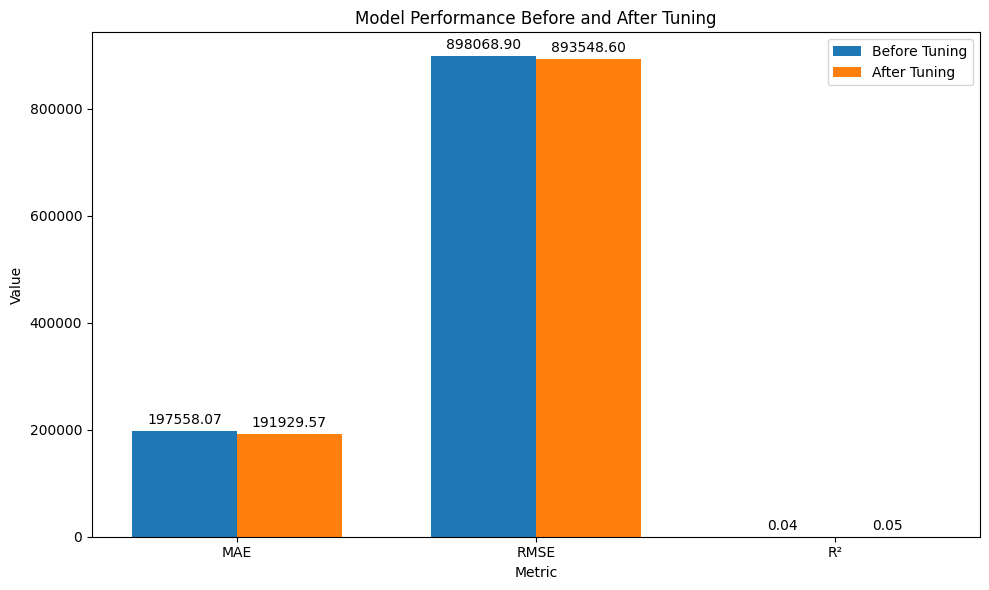

In [10]:
import matplotlib.pyplot as plt
import numpy as np

metric_names = ['MAE', 'RMSE', 'R²']
metrics_before_tuning = [mae_before_tuning, rmse_before_tuning, r2_before_tuning]
metrics_after_tuning = [mae_after_tuning, rmse_after_tuning, r2_after_tuning]

x = np.arange(len(metric_names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, metrics_before_tuning, width, label='Before Tuning')
rects2 = ax.bar(x + width/2, metrics_after_tuning, width, label='After Tuning')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Value')
ax.set_xlabel('Metric')
ax.set_title('Model Performance Before and After Tuning')
ax.set_xticks(x)
ax.set_xticklabels(metric_names)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [14]:
mae_improvement = mae_before_tuning - mae_after_tuning

reflection_markdown = """
## Reflection on Random Forest Hyperparameter Tuning

This tuning process aimed to optimize the performance of a Random Forest Regressor model for predicting house prices. We used **RandomizedSearchCV** to efficiently explore a defined range of hyperparameter values. RandomizedSearchCV works by sampling a fixed number of hyperparameter combinations from the specified distribution, performing cross-validation for each combination, and identifying the set of hyperparameters that yields the best performance based on a chosen scoring metric (in this case, negative mean absolute error, equivalent to minimizing MAE).

We tuned the following hyperparameters:

*   **`n_estimators`**: The number of trees in the forest. Increasing this generally improves performance but also increases computation time.
*   **`max_depth`**: The maximum depth of each tree. Deeper trees can capture more complex relationships but risk overfitting.
*   **`min_samples_split`**: The minimum number of samples required to split an internal node. Higher values prevent the tree from splitting on small groups of samples, which can help with overfitting.
*   **`min_samples_leaf`**: The minimum number of samples required to be at a leaf node. Similar to `min_samples_split`, higher values can help prevent overfitting.
*   **`max_features`**: The number of features to consider when looking for the best split. `'sqrt'` (equivalent to `auto` in older versions) and `'log2'` are common choices that introduce randomness and can help prevent overfitting.

Analyzing the performance metrics before and after tuning reveals a modest improvement:

*   **MAE (Mean Absolute Error):** Decreased from approximately {mae_before_tuning:.2f} to {mae_after_tuning:.2f}. This indicates that, on average, the tuned model's predictions are closer to the actual prices by about ${mae_improvement:.2f}.
*   **RMSE (Root Mean Squared Error):** Decreased from approximately {rmse_before_tuning:.2f} to {rmse_after_tuning:.2f}. RMSE penalizes larger errors more heavily than MAE. The decrease suggests that the tuned model also reduced some of the larger prediction errors.
*   **R² (R-squared):** Increased from approximately {r2_before_tuning:.4f} to {r2_after_tuning:.4f}. R² represents the proportion of the variance in the dependent variable (price) that is predictable from the independent variables. While still relatively low, the increase indicates that the tuned model explains a slightly larger percentage of the variance in house prices compared to the untuned model.

The tuning process, while showing a performance improvement, comes with a **trade-off in computation time**. Training multiple models with different hyperparameter combinations and performing cross-validation is significantly more time-consuming than training a single model with default settings. For this specific dataset and the chosen parameter grid, the improvement in accuracy is noticeable but not substantial.

In conclusion, hyperparameter tuning using RandomizedSearchCV on this Random Forest model resulted in a slight improvement in performance metrics (lower MAE and RMSE, slightly higher R²). The impact of the tuned hyperparameters is reflected in these improved scores, suggesting that the search found a slightly better configuration for this dataset. However, this improvement came at the cost of increased computation time required for the tuning process. For this particular problem, the observed performance improvement might be considered marginal relative to the computational expense, and a decision on whether to use the tuned model would depend on the specific requirements and constraints of the application.

""".format(mae_before_tuning=mae_before_tuning, mae_after_tuning=mae_after_tuning, rmse_before_tuning=rmse_before_tuning, rmse_after_tuning=rmse_after_tuning, r2_before_tuning=r2_before_tuning, r2_after_tuning=r2_after_tuning, mae_improvement=mae_improvement)

print(reflection_markdown)


## Reflection on Random Forest Hyperparameter Tuning

This tuning process aimed to optimize the performance of a Random Forest Regressor model for predicting house prices. We used **RandomizedSearchCV** to efficiently explore a defined range of hyperparameter values. RandomizedSearchCV works by sampling a fixed number of hyperparameter combinations from the specified distribution, performing cross-validation for each combination, and identifying the set of hyperparameters that yields the best performance based on a chosen scoring metric (in this case, negative mean absolute error, equivalent to minimizing MAE).

We tuned the following hyperparameters:

*   **`n_estimators`**: The number of trees in the forest. Increasing this generally improves performance but also increases computation time.
*   **`max_depth`**: The maximum depth of each tree. Deeper trees can capture more complex relationships but risk overfitting.
*   **`min_samples_split`**: The minimum number of samples required 